# Libraries

In [31]:
# Numerical
import numpy as np
import pandas as pd
# Viz
import matplotlib.pyplot as plt
import seaborn as sns
# Viz Settings
sns.set_style(style='darkgrid')
# Importing Files
import glob

# Importing Data
## CNC Data

In [32]:
# List of Data Files & Locations
path = r'F:\Work - Detroit Diesel\CNC_Machining_Dataset'
filenames = glob.glob(path + '/experiment*.csv')

# Making a list of DFs (1 DF per CSV file)
li = []
i = 1
for file in filenames:
    dfs = pd.read_csv(file,index_col=None,header=0)                             # Making DF for each dataset
    dfs['exp_no'] = i                                                           # Identifying the exp number
    i += 1                                                                      # Iterating through exp numbers
    li.append(dfs)                                                              # Appending the DF to the outside list

# Concatendating all individual DFs together
## If headers are the same, then each new item is concatenated to the end
df = pd.concat(li,ignore_index=True)

In [33]:
df.head()

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,...,S1_DCBusVoltage,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process,exp_no
0,198.0,0.0,0.00,198.0,0.0,0.000000,0.18,0.0207,329.0,2.77,...,2.740000e-19,329.0,0.0,6.960000e-07,12.0,1.0,0.0,50.0,Starting,1
1,198.0,-10.8,-350.00,198.0,-13.6,-358.000000,-10.90,0.1860,328.0,23.30,...,2.740000e-19,328.0,0.0,-5.270000e-07,12.0,1.0,4.0,50.0,Prep,1
2,196.0,-17.8,-6.25,196.0,-17.9,-0.000095,-8.59,0.1400,328.0,30.60,...,2.740000e-19,328.0,0.0,9.100000e-07,12.0,1.0,7.0,50.0,Prep,1
3,194.0,-18.0,0.00,194.0,-17.9,-0.000095,-6.11,0.1300,327.0,30.30,...,2.740000e-19,328.0,0.0,1.070000e-06,12.0,1.0,7.0,50.0,Prep,1
4,193.0,-17.9,-18.80,192.0,-17.9,0.000095,-5.70,0.1140,328.0,30.50,...,2.740000e-19,328.0,0.0,1.960000e-06,12.0,1.0,7.0,50.0,Prep,1


## Importing Experimental Results Data

In [34]:
exp_result = pd.read_csv(r'F:\Work - Detroit Diesel\CNC_Machining_Dataset\train.csv')

In [35]:
exp_result.head()

,No,material,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
0,1,wax,6,4.0,unworn,yes,yes
1,2,wax,20,4.0,unworn,yes,yes
2,3,wax,6,3.0,unworn,yes,yes
3,4,wax,6,2.5,unworn,no,NaN
4,5,wax,20,3.0,unworn,no,NaN


In [36]:
# Cleaning Exp Data
exp_result['passed_visual_inspection'].fillna('no',inplace=True)

In [37]:
exp_result.head()

,No,material,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
0,1,wax,6,4.0,unworn,yes,yes
1,2,wax,20,4.0,unworn,yes,yes
2,3,wax,6,3.0,unworn,yes,yes
3,4,wax,6,2.5,unworn,no,no
4,5,wax,20,3.0,unworn,no,no


## `JOIN` Exp Results & CNC Data

In [38]:
df_final = df.merge(exp_result,right_on='No',left_on='exp_no',how='left')

In [39]:
df_final[df_final['exp_no']==1]

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,...,M1_CURRENT_FEEDRATE,Machining_Process,exp_no,No,material,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
0,198.0,0.000,0.00,198.0,0.0,0.000000,0.18,0.0207,329.0,2.77,...,50.0,Starting,1,1,wax,6,4.0,unworn,yes,yes
1,198.0,-10.800,-350.00,198.0,-13.6,-358.000000,-10.90,0.1860,328.0,23.30,...,50.0,Prep,1,1,wax,6,4.0,unworn,yes,yes
2,196.0,-17.800,-6.25,196.0,-17.9,-0.000095,-8.59,0.1400,328.0,30.60,...,50.0,Prep,1,1,wax,6,4.0,unworn,yes,yes
3,194.0,-18.000,0.00,194.0,-17.9,-0.000095,-6.11,0.1300,327.0,30.30,...,50.0,Prep,1,1,wax,6,4.0,unworn,yes,yes
4,193.0,-17.900,-18.80,192.0,-17.9,0.000095,-5.70,0.1140,328.0,30.50,...,50.0,Prep,1,1,wax,6,4.0,unworn,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,141.0,0.175,87.50,141.0,0.0,0.000000,-2.84,0.0522,325.0,7.39,...,50.0,end,1,1,wax,6,4.0,unworn,yes,yes
1051,141.0,-0.150,-87.50,141.0,0.0,0.000000,-1.85,0.0522,325.0,2.69,...,50.0,end,1,1,wax,6,4.0,unworn,yes,yes
1052,141.0,-0.175,-87.50,141.0,0.0,0.000000,-2.20,0.0527,325.0,2.22,...,50.0,end,1,1,wax,6,4.0,unworn,yes,yes
1053,141.0,0.150,87.50,141.0,0.0,0.000000,-4.02,0.0502,326.0,5.80,...,50.0,end,1,1,wax,6,4.0,unworn,yes,yes


# Exploratory Data Analysis

In [40]:
# Remove 'No' because we do not need two columns that say the same thing
df_final.drop('No',axis=1,inplace=True)
df_final.head()

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,...,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process,exp_no,material,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
0,198.0,0.0,0.00,198.0,0.0,0.000000,0.18,0.0207,329.0,2.77,...,0.0,50.0,Starting,1,wax,6,4.0,unworn,yes,yes
1,198.0,-10.8,-350.00,198.0,-13.6,-358.000000,-10.90,0.1860,328.0,23.30,...,4.0,50.0,Prep,1,wax,6,4.0,unworn,yes,yes
2,196.0,-17.8,-6.25,196.0,-17.9,-0.000095,-8.59,0.1400,328.0,30.60,...,7.0,50.0,Prep,1,wax,6,4.0,unworn,yes,yes
3,194.0,-18.0,0.00,194.0,-17.9,-0.000095,-6.11,0.1300,327.0,30.30,...,7.0,50.0,Prep,1,wax,6,4.0,unworn,yes,yes
4,193.0,-17.9,-18.80,192.0,-17.9,0.000095,-5.70,0.1140,328.0,30.50,...,7.0,50.0,Prep,1,wax,6,4.0,unworn,yes,yes


In [41]:
df_final.describe()

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,...,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,exp_no,feedrate,clamp_pressure
count,25286.000000,25286.000000,25286.000000,25286.000000,25286.000000,25286.000000,25286.000000,2.528600e+04,25286.000000,25286.000000,...,25286.000000,25286.000000,25286.000000,25286.0,25286.000000,25286.000000,25286.000000,25286.000000,25286.000000,25286.000000
mean,159.052045,-0.288657,0.094264,159.050700,-0.283076,0.253215,-0.469714,6.603073e-02,326.945859,7.986942,...,322.784505,85.479195,0.127405,12.0,1.003441,47.345013,16.542039,10.738235,7.123942,3.368168
std,19.330873,5.658260,93.877623,19.331144,5.664309,72.594951,4.220750,3.700384e-02,1.459937,7.710379,...,4.293571,52.531863,0.080753,0.0,0.349055,43.826214,19.620219,5.213285,6.167036,0.615639
min,141.000000,-20.400000,-1280.000000,141.000000,-20.000000,-1000.000000,-23.400000,2.780000e-19,320.000000,0.000000,...,290.000000,0.000000,-0.002960,12.0,0.000000,0.000000,3.000000,1.000000,3.000000,2.500000
25%,145.000000,-2.050000,-31.300000,145.000000,-2.050000,0.000000,-3.930000,4.150000e-02,326.000000,2.590000,...,320.000000,0.000000,0.000005,12.0,1.000000,2.000000,3.000000,6.000000,3.000000,3.000000
50%,153.000000,0.000000,0.000000,153.000000,0.000000,0.000000,-0.666000,6.680000e-02,327.000000,7.140000,...,322.000000,117.000000,0.164000,12.0,1.000000,39.000000,6.000000,12.000000,3.000000,3.000000
75%,162.000000,0.200000,25.000000,162.000000,0.000000,0.000000,3.140000,9.130000e-02,327.000000,10.200000,...,327.000000,119.000000,0.183000,12.0,1.000000,85.000000,20.000000,15.000000,6.000000,4.000000
max,198.000000,50.700000,1440.000000,198.000000,50.000000,1000.000000,27.100000,3.800000e-01,331.000000,75.400000,...,332.000000,130.000000,0.569000,12.0,4.000000,135.000000,50.000000,18.000000,20.000000,4.000000


In [42]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25286 entries, 0 to 25285
Data columns (total 55 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X1_ActualPosition          25286 non-null  float64
 1   X1_ActualVelocity          25286 non-null  float64
 2   X1_ActualAcceleration      25286 non-null  float64
 3   X1_CommandPosition         25286 non-null  float64
 4   X1_CommandVelocity         25286 non-null  float64
 5   X1_CommandAcceleration     25286 non-null  float64
 6   X1_CurrentFeedback         25286 non-null  float64
 7   X1_DCBusVoltage            25286 non-null  float64
 8   X1_OutputCurrent           25286 non-null  float64
 9   X1_OutputVoltage           25286 non-null  float64
 10  X1_OutputPower             25286 non-null  float64
 11  Y1_ActualPosition          25286 non-null  float64
 12  Y1_ActualVelocity          25286 non-null  float64
 13  Y1_ActualAcceleration      25286 non-null  flo

In [43]:
df_final['Machining_Process'].unique()

array(['Starting', 'Prep', 'Layer 1 Up', 'Layer 1 Down', 'Repositioning',
       'Layer 2 Up', 'Layer 2 Down', 'Layer 3 Up', 'Layer 3 Down', 'end',
       'End'], dtype=object)

<AxesSubplot:xlabel='Machining_Process', ylabel='count'>

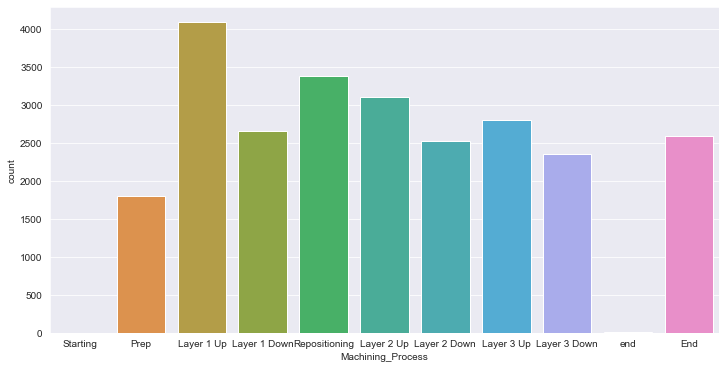

In [44]:
plt.figure(figsize=(12,6))
sns.countplot(data=df_final,
              x='Machining_Process'
             )

In [45]:
df_final['Machining_Process'].value_counts()

Layer 1 Up       4085
Repositioning    3377
Layer 2 Up       3104
Layer 3 Up       2794
Layer 1 Down     2655
End              2585
Layer 2 Down     2528
Layer 3 Down     2354
Prep             1795
end                 8
Starting            1
Name: Machining_Process, dtype: int64

### Note for Data Cleansing:
Need to adjust the 'end' to read 'End'. Also need to change the 'Start' to 'Prep'

## Data Cleaning

In [46]:
df_final['Machining_Process'].replace(to_replace=('end','Starting'),value=('End','Prep'),inplace=True)

In [47]:
df_final['Machining_Process'].value_counts()

Layer 1 Up       4085
Repositioning    3377
Layer 2 Up       3104
Layer 3 Up       2794
Layer 1 Down     2655
End              2593
Layer 2 Down     2528
Layer 3 Down     2354
Prep             1796
Name: Machining_Process, dtype: int64

# Back to EDA

<AxesSubplot:xlabel='tool_condition', ylabel='count'>

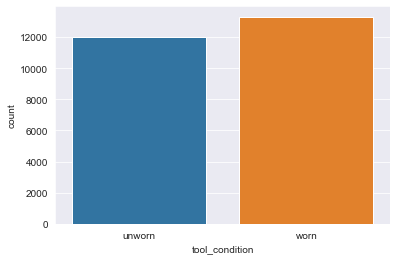

In [48]:
sns.countplot(data=df_final,
              x='tool_condition'
             )

<AxesSubplot:xlabel='machining_finalized', ylabel='count'>

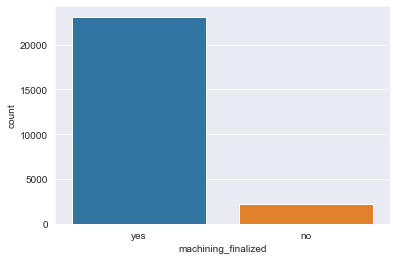

In [49]:
sns.countplot(data=df_final,x='machining_finalized')